In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sns.set_style('whitegrid')

Загрузим данные по магазинам.

In [4]:
data_stores = pd.read_csv('data_stores.csv')

In [5]:
data_stores.dtypes

STORE_ID                     int64
STORE_NAME                  object
ADDRESS_CITY_NAME           object
ADDRESS_STATE_PROV_CODE     object
MSA_CODE                     int64
SEG_VALUE_NAME              object
PARKING_SPACE_QTY          float64
SALES_AREA_SIZE_NUM          int64
AVG_WEEKLY_BASKETS         float64
dtype: object

In [6]:
data_stores.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308


Обратим внимание:
* количество парковочных мест известно для менее чем половины магазинов. 
* MSA_CODE - категориальный признак, характеризующий уровень жизни (возможно ординальный)
* SEG_VALUE_NAME - ординальный признак, характеризующий тип магазина (Value - "Пятерочка", Mainstream - "Перекрёсток", Upscale - "Азбука вкуса"
* Кроме того даны вещественные признаки: площадь магазина, средняя выручка

In [7]:
data_stores.describe()

,STORE_ID,MSA_CODE,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,79.000000,79.000000,27.000000,79.000000,79.000000
mean,14502.468354,21236.202532,480.518519,49145.164557,24146.806232
std,8868.762031,6138.649376,403.659641,13512.452153,8720.396844
min,367.000000,13140.000000,17.000000,10788.000000,10434.705128
25%,6183.000000,17140.000000,282.000000,43067.500000,17522.432693
50%,15541.000000,19100.000000,351.000000,48594.000000,24567.750000
75%,23058.000000,26420.000000,488.500000,55200.500000,29186.262821
max,29159.000000,47540.000000,1859.000000,86517.000000,54052.519231


Для начала проверим, коррелирует ли  SALES_AREA и AVG_WEEKLY_BASKETS

In [8]:
data_glossary = pd.read_csv('data_glossary.csv')

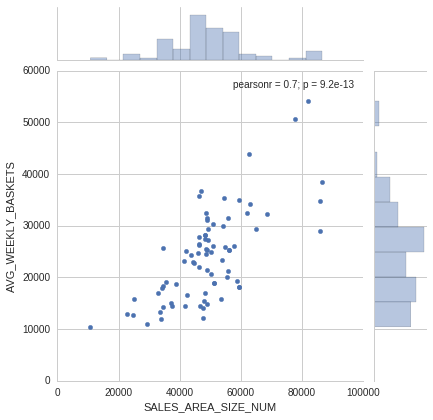

In [9]:
sns.jointplot(x = 'SALES_AREA_SIZE_NUM', y ='AVG_WEEKLY_BASKETS',data = data_stores)

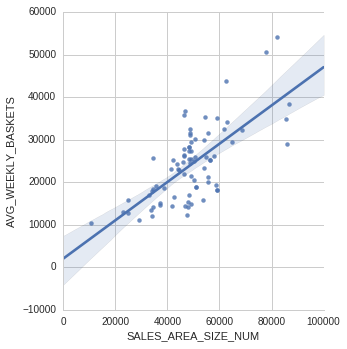

In [10]:
sns.lmplot(x = 'SALES_AREA_SIZE_NUM', y ='AVG_WEEKLY_BASKETS',data = data_stores)

Проверим, влияет ли как-то MSA-CODE ((Metropolitan Statistical Area) geographic region with a high core population density and close economic ties throughout the surrounding areas) на "average weekly baskets sold in the store".


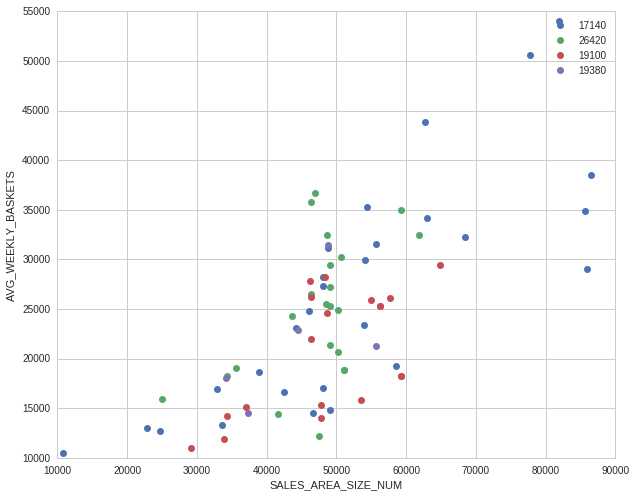

In [11]:
plt.figure(figsize = (10,8))

for msa_code in data_stores['MSA_CODE'].value_counts().keys()[:4]:
    xs = data_stores['SALES_AREA_SIZE_NUM'][data_stores['MSA_CODE'] == msa_code]
    ys = data_stores['AVG_WEEKLY_BASKETS'][data_stores['MSA_CODE'] == msa_code]
    plt.plot(xs, ys,'o',label = msa_code)
plt.xlabel('SALES_AREA_SIZE_NUM')
plt.ylabel('AVG_WEEKLY_BASKETS')
plt.legend()

Рассмотрим теперь подробнее датасет с товарами.
В качестве дальнейшей обработки возможно переделать PRODUCT_SIZE в вещественный признак - объём.
Важным категориальным признаком здесь является **CATEGORY**, кроме того, можно также обратить внимание на **MANUFACTURER** (возможно, различные "лейблы" имеют различный спрос)

In [12]:
data_products = pd.read_csv('data_products.csv')

In [13]:
data_products.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [14]:
def PRODUCTSIZE_to_ML(name):
    if name.split()[-1] == 'OZ':
        return 29.5735*float(name.split()[0])
    elif name.split()[-1] == 'LT':
        return 1000.*float(name.split()[0])
    elif name.split()[-1] == 'ML':
        return 1.*float(name.split()[0])
    elif name.split()[-1] == 'CT':
        return 1.*float(name.split()[0])
    
data_products['FLOAT_PRODUCT_SIZE'] = data_products['PRODUCT_SIZE'].apply(PRODUCTSIZE_to_ML)

Наконец, перейдём к рассмотрению истории транзакций.

In [15]:
data_transaction = pd.read_csv('data_transactions.csv')

Проведём основную часть разведывательного анализа данных графически.

In [16]:
data_transaction.describe()

,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
count,524950.000000,5.249500e+05,524950.000000,524950.000000,524950.000000,524950.000000,524927.000000,524765.000000,524950.000000,524950.000000,524950.000000
mean,14690.105660,1.031631e+10,19.608256,17.167349,16.777282,53.200729,3.382174,3.602747,0.084296,0.110134,0.134744
std,8891.432359,2.081698e+10,29.934184,24.740741,24.186299,68.180697,1.559303,1.631726,0.277831,0.313057,0.341451
min,367.000000,1.111009e+09,0.000000,1.000000,1.000000,0.000000,0.000000,0.550000,0.000000,0.000000,0.000000
25%,6187.000000,1.111087e+09,4.000000,4.000000,4.000000,13.360000,2.360000,2.500000,0.000000,0.000000,0.000000
50%,15541.000000,3.700032e+09,10.000000,9.000000,9.000000,31.920000,2.990000,3.170000,0.000000,0.000000,0.000000
75%,23067.000000,7.192100e+09,24.000000,21.000000,21.000000,67.600000,4.490000,4.590000,0.000000,0.000000,0.000000
max,29159.000000,8.849121e+10,1800.000000,1340.000000,1286.000000,2952.000000,11.460000,11.460000,1.000000,1.000000,1.000000


Для начала соединим все данные в один датасет:

In [17]:
data = pd.merge(data_transaction,data_products, on = 'UPC')
data_stores['STORE_NUM'] = data_stores['STORE_ID']
data = pd.merge(data,data_stores, on = 'STORE_NUM')

В датасете видим, что большая часть (три признака **FEATURE,	DISPLAY,	TPR_ONLY**) уделена различного рода рекламе. Попробуем оценить, как влияет реклама на количество еженедельно покупаемых товаров в различной категории (**UNITS**) и еженедельную выручку (**SPEND**) 

Посмотрим, как влияют рекламные акции для товара на его уровень продаж. ("DISPLAY" и "UNITS")

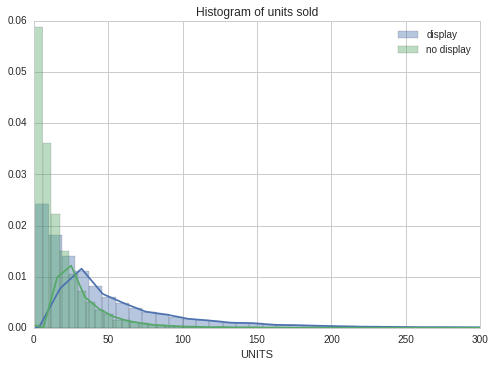

In [18]:
sns.distplot(data[data['DISPLAY'] == 1]['UNITS'],bins = 200,label = 'display' )
sns.distplot(data[data['DISPLAY'] == 0]['UNITS'], bins = 200,label = 'no display')
plt.xlim(0,300)
plt.legend()
plt.title('Histogram of units sold')

In [19]:
print "MEAN UNITS SOLD WITH PROMOTION = ", data[data['DISPLAY'] == 1]['UNITS'].mean()
print "MEAN UNITS SOLD WITHOUT PROMOTION =", data[data['DISPLAY'] == 0]['UNITS'].mean()
print "MEDIAN UNITS SOLD WITH PROMOTION = ", data[data['DISPLAY'] == 1]['UNITS'].median()
print "MEDIAN UNITS SOLD WITHOUT PROMOTION =", data[data['DISPLAY'] == 0]['UNITS'].median()

MEAN UNITS SOLD WITH PROMOTION =  45.6481481481
MEAN UNITS SOLD WITHOUT PROMOTION = 16.3944184862
MEDIAN UNITS SOLD WITH PROMOTION =  27.0
MEDIAN UNITS SOLD WITHOUT PROMOTION = 9.0


Построим распределения типа violinplot

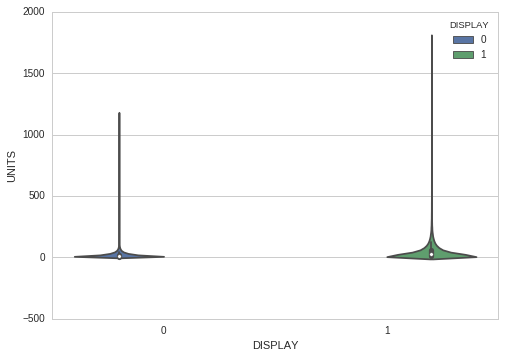

In [20]:
sns.violinplot(x = 'DISPLAY', y = 'UNITS',data = data, hue = 'DISPLAY')

Видим, что существуют значительные выбросы в значениях UNITS (количество еженедельно продаваемых товаров). Попробуем построить violin plot, "отрезав" выбросы по уровню 5% (оставим данные, попадающие в интервал между 2.5% и 97.5% квантилем распределения UNITS)

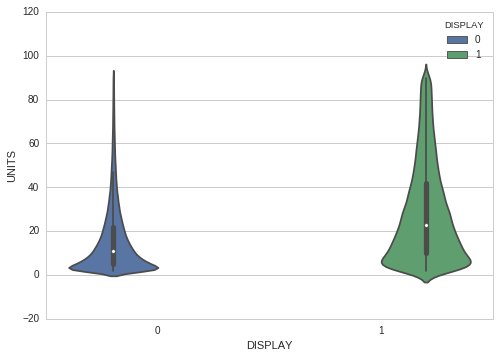

In [21]:
data_cut = data[(data['UNITS']>data['UNITS'].quantile(q = 0.025))&(data['UNITS']<data['UNITS'].quantile(q = 0.975))]
sns.violinplot(x = 'DISPLAY', y = 'UNITS',data = data_cut, hue = 'DISPLAY')

Из violin plot видно, что медианы распределений отличаются. Следует ожидать, что реклама типа DISPLAY положительным образом сказывается на уровне продаж

Посмотрим, как влияют рекламные акции DISPLAY на количество покупаемой продукции по категориям. Для начала рассмотрим оценки для средних, а затем медианы

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

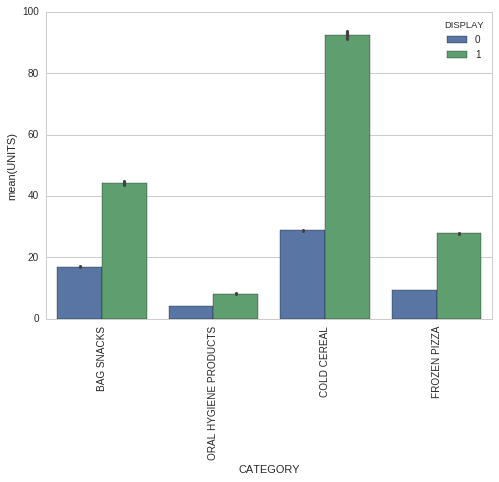

In [22]:
sns.barplot(x = 'CATEGORY', y = 'UNITS',data = data, hue = 'DISPLAY')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

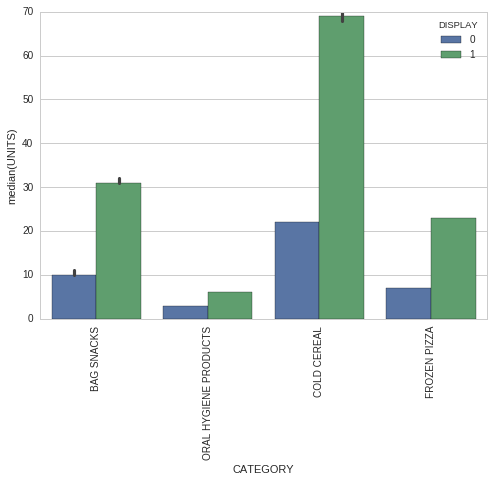

In [23]:
sns.barplot(x = 'CATEGORY', y = 'UNITS',data = data, hue = 'DISPLAY',estimator=np.median)
plt.xticks(rotation = 90)

Взглянем, как выглядят распределения  UNITS внутри каждой из категорий

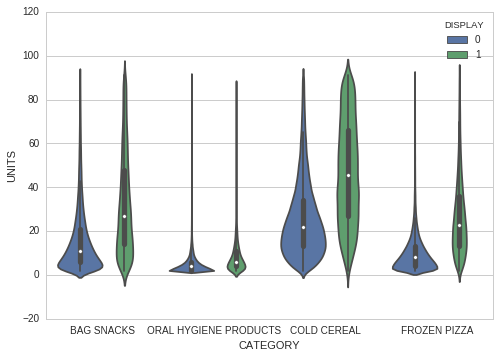

In [24]:
sns.violinplot(x = 'CATEGORY', y = 'UNITS',data = data_cut, hue = 'DISPLAY')

Более информативным в таком случае может быть ящик с усами

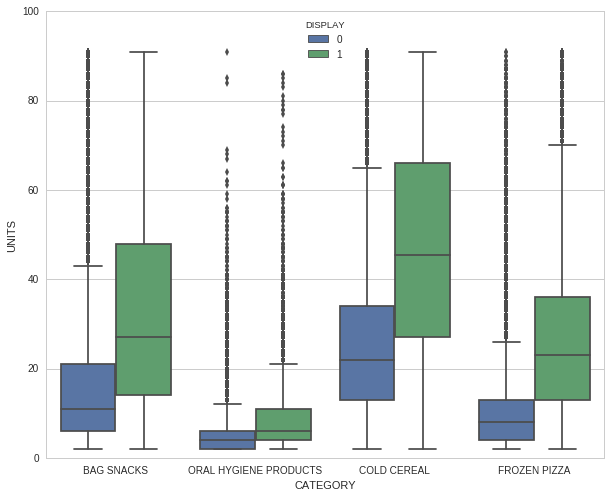

In [25]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'CATEGORY', y = 'UNITS',data = data_cut, hue = 'DISPLAY')

Наконец, посмотрим, в какое количество раз изменилось значение среднего (т.е. для какой категории товаров реклама проходит наиболее "эффективно")

In [26]:
cats = []
meadian_in_cats = []
for cat in data['CATEGORY'].unique():
    m_d = data['UNITS'][data['CATEGORY'] == cat][data['DISPLAY'] == 1].median()
    m_nd = data['UNITS'][data['CATEGORY'] == cat][data['DISPLAY'] == 0].median()
    cats.append(cat)
    meadian_in_cats.append((m_d-m_nd)/m_nd)

(-0.5, 4.1)

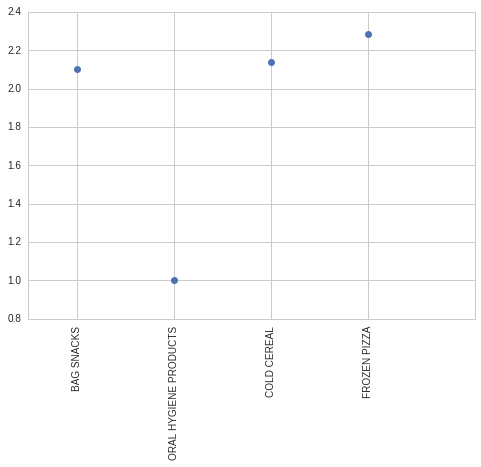

In [27]:
plt.plot(meadian_in_cats,'o')
plt.xticks(range(len(cats)), cats,rotation = 90)
plt.xlim(-0.5,len(cats)+0.1)

In [28]:
for x in sorted(zip(meadian_in_cats,cats)):
    print x

(1.0, 'ORAL HYGIENE PRODUCTS')
(2.1, 'BAG SNACKS')
(2.1363636363636362, 'COLD CEREAL')
(2.2857142857142856, 'FROZEN PIZZA')


Кажется, здесь побеждают пиццы премиального класса и хлопушки для детей, а омывайка для рта идёт не очень :)

То же можно оценить и для TPR_ONLY

Посмотрим теперь, как снижение цен, неотображаемое в рекламе, влияет на спрос покупателя. (TPR ONLY отражает факт снижения стоимости без отображения рекламы)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

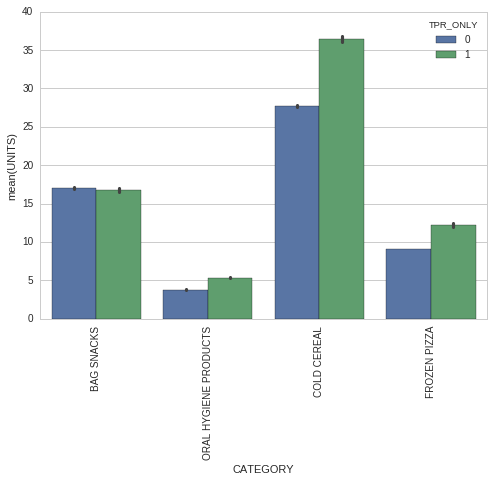

In [29]:
sns.barplot(x =  'CATEGORY', y = 'UNITS',data = data[data['DISPLAY'] == 0], hue = 'TPR_ONLY')
plt.xticks(rotation = 90)

Не так сильно, как реклама, но всё же.

Можно посмотреть, какие по цене товары каждой категории (CATEGORY) приносят наибольший доход.

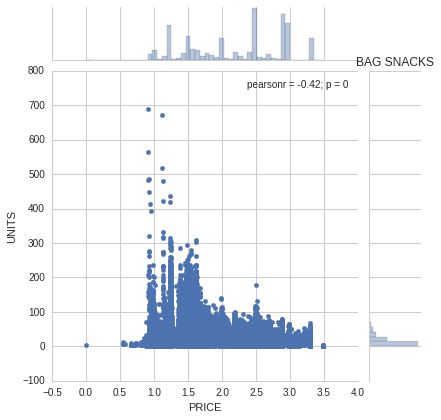

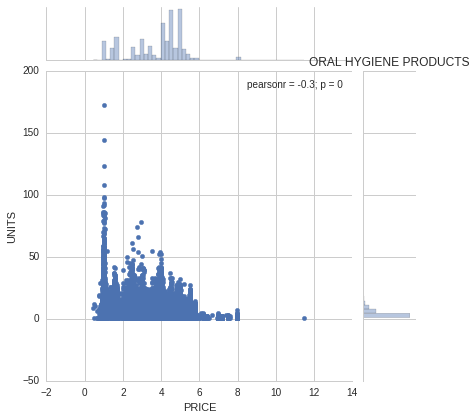

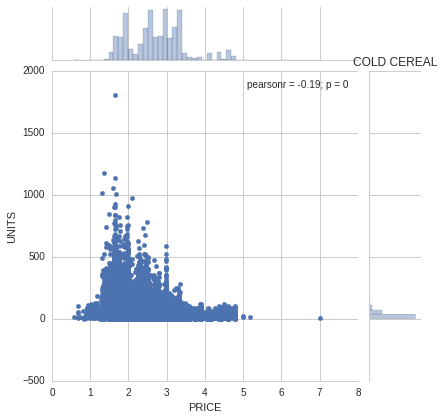

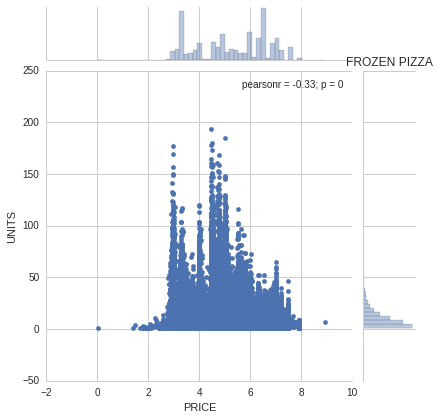

In [30]:
for cat in cats:
    sns.jointplot(y = 'UNITS',x = 'PRICE', data = data[data['CATEGORY'] == cat])
    plt.title(cat)

Видно, что покупатели склонны покупать не только дешевые товары, но и товары среднего ценового диапазона.

Для регрессионных моделей можно построить зависимость "спроса" от цены для каждой подкатегории, например.

/home/boris/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


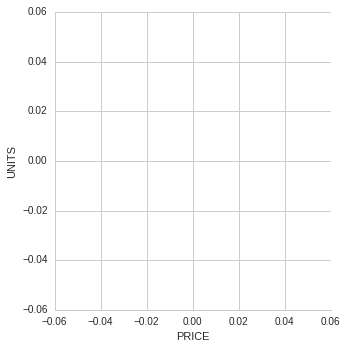

In [ ]:
sns.lmplot(y = 'UNITS', x = 'PRICE', data = data[data['CATEGORY'] == 'PRETZELS'][data['STORE_NUM'] == 367])

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
sns.barplot(x = 'SEG_VALUE_NAME',y = 'SPEND' ,data = data,ax = ax1)
sns.barplot(y = 'AVG_WEEKLY_BASKETS',x = 'SEG_VALUE_NAME',data = data,ax = ax2)

Заметим, что реклама может быть не только типа DISPLAY (рекламные стенды), но и типа FEATURE (рекламные буклеты). Рассмотрим как влияет каждый из этих факторов на еженедельную выручку (SPEND), и взаимодействуют ли они друг с другом.

Для начала найдём максимальный размер "слайса", который мы можем сделать, разбивая выборку по признакам FEATURE, DISPLAY, CATEGORY:

In [ ]:
m = len(data)
for cat in data['CATEGORY'].unique():
    for i in [0,1]:
        for j in [0,1]:
            if m > len(data[(data['FEATURE'] == i)&(data['DISPLAY'] == j)&(data['CATEGORY'] == cat)]):
                m = len(data[(data['FEATURE'] == i)&(data['DISPLAY'] == j)&(data['CATEGORY'] == cat)])
print "maximal slice size = ", m 

Посмотрим на то, как для различных категорий отличается средняя выручка в зависимости от наличия различных типов рекламы

In [ ]:
slice_size = 1000

plt.figure(figsize = (10,8))
for cat in data_products['CATEGORY'].unique():
    mean_spend = []

    labels = ['NO FEATURE, NO DISPLAY', 'NO FEATURE, DISPLAY','FEATURE, NO DISPLAY', 'FEATURE, DISPLAY'] 
    for i in [0,1]:
        for j in [0,1]:
            mean_spend.append(
                data[(data['FEATURE'] == i)&(data['DISPLAY'] == j)
                     &(data['CATEGORY'] == cat)]['SPEND'][:slice_size].mean()
                )
    plt.plot(mean_spend,'o-',label = cat)
plt.xticks(range(len(labels)),labels)
plt.xlim(-0.1,len(labels)+0.1)
plt.legend(loc = 'best')

Видно, что признаки, скорее всего, взаимодействуют между собой.

Обратим также внимание, что мы имеем дело с магазинами различных "классов" (SEG_VALUE_NAME). Рассмотрим, как влияет такого рода рекламы ещё и для магазинов различных классов

In [ ]:
slice_size = 300


for cat in data_products['CATEGORY'].unique():
    plt.figure(figsize = (8,6))
    for seg_value in data_stores['SEG_VALUE_NAME'].unique():
        mean_spend = []

        labels = ['NO FEATURE, NO DISPLAY', 'NO FEATURE, DISPLAY','FEATURE, NO DISPLAY', 'FEATURE, DISPLAY'] 
        for i in [0,1]:
            for j in [0,1]:
                mean_spend.append(
                    data[(data['FEATURE'] == i)&(data['DISPLAY'] == j)
                         &(data['CATEGORY'] == cat)&
                         (data['SEG_VALUE_NAME']==seg_value)]['SPEND'][:slice_size].mean()
                    )
        plt.plot(mean_spend,'o-',label = seg_value )
    plt.xticks(range(len(labels)),labels)
    plt.xlim(-0.1,len(labels)+0.1)
    plt.legend(loc = 'best')
    plt.title(cat)

Выясним, отличаются ли продажы в магазинах различного "класса".

In [ ]:
for cat in data['CATEGORY'].unique():
    data_cat = data[data['CATEGORY'] == cat][(data['SPEND']<data['SPEND'].quantile(q = 0.95))
                                                      &(data['SPEND']>data['SPEND'].quantile(q = 0.05))]
    data_cat.boxplot('SPEND', by = 'SEG_VALUE_NAME')
    plt.title(cat)

One-way ANOVA (как влияет SEG_VALUE_NAME на SPEND):

In [ ]:
for cat in data['CATEGORY'].unique():
    data_cat = data[data['CATEGORY'] == cat][(data['SPEND']<data['SPEND'].quantile(q = 0.95))
                                                      &(data['SPEND']>data['SPEND'].quantile(q = 0.05))]
    seg_values = pd.unique(data_cat['SEG_VALUE_NAME'].values)
    d_data_spend = {seg_value:data_cat['SPEND'][data_cat['SEG_VALUE_NAME'] == seg_value] \
        for seg_value in seg_values}
    F, p = stats.f_oneway(d_data_spend['MAINSTREAM'][:slice_size], d_data_spend['UPSCALE'][:slice_size], d_data_spend['VALUE'][:slice_size])
    print '\n--------------------\n'
    print cat
    print "F =",F
    print "P-value =",p

Two-way ANOVA:
будем проверять влияение для каждой категории товара (сначала для какой-то одной), как влияют друг на друга такие признаки, как 'FEATURE' (A) и 'DISPLAY' (B) (т.е. рекламируется ли данная категория товаров в буклете и есть ли реклама на стендах)
![](http://www.marsja.se/wp-content/uploads/2016/03/two-way-anova-sum-of-squares.png)

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
sample_slice = 2000
data_grouped = data_cat[(data_cat['FEATURE'] == 0)&(data_cat['DISPLAY'] == 0)][:sample_slice]
data_grouped = pd.concat([data_grouped,
                        data_cat[(data_cat['FEATURE'] == 0)&(data_cat['DISPLAY'] == 1)][:sample_slice]])
data_grouped = pd.concat([data_grouped,
                        data_cat[(data_cat['FEATURE'] == 1)&(data_cat['DISPLAY'] == 0)][:sample_slice]])
data_grouped = pd.concat([data_grouped,
                        data_cat[(data_cat['FEATURE'] == 1)&(data_cat['DISPLAY'] == 1)][:sample_slice]])

In [ ]:
formula = 'SPEND ~ C(FEATURE) + C(DISPLAY) + C(FEATURE):C(DISPLAY)'

model = ols(formula, data_grouped).fit()
aov_table = anova_lm(model, typ=2)

In [ ]:

sample_slice = 2000
for cat in data_products['CATEGORY'].unique():
    data_cat = data[data['CATEGORY'] == cat][(data['SPEND']<data['SPEND'].quantile(q = 0.95))
                                                  &(data['SPEND']>data['SPEND'].quantile(q = 0.05))]
    data_grouped = data_cat[(data_cat['FEATURE'] == 0)&(data_cat['DISPLAY'] == 0)][:sample_slice]
    data_grouped = pd.concat([data_grouped,
                            data_cat[(data_cat['FEATURE'] == 0)&(data_cat['DISPLAY'] == 1)][:sample_slice]])
    data_grouped = pd.concat([data_grouped,
                            data_cat[(data_cat['FEATURE'] == 1)&(data_cat['DISPLAY'] == 0)][:sample_slice]])
    data_grouped = pd.concat([data_grouped,
                            data_cat[(data_cat['FEATURE'] == 1)&(data_cat['DISPLAY'] == 1)][:sample_slice]])
    model = ols(formula, data_grouped).fit()
    aov_table = anova_lm(model, typ=2)
    print '\n----------------------------------------\n'
    print cat
    print aov_table

In [ ]:
##if u need some eta^2
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

Посмотрим на средний еженедельный доход от продажи различных категорий товаров в магазинах различного класса

In [ ]:
grouped_by_cat = data.groupby(['CATEGORY','SEG_VALUE_NAME'])

xs = np.zeros(3*4)
for i,x in enumerate(grouped_by_cat.mean()['SPEND']):
    xs[i] = x

cats = data['CATEGORY'].unique()
seg_values = data['SEG_VALUE_NAME'].unique()

d = {cat: xs[3*i:3*i+3] for i,cat in enumerate(cats)}

f, axarr = plt.subplots(1,4,figsize = (20,5))
colors = ['yellowgreen', 'gold', 'lightskyblue']
for i,cat in enumerate(cats):
    explode = [0.,0.,0.1]
    axarr[i].pie(d[cat],labels = seg_values,colors = colors, shadow=True,autopct = '%1.1f%%',explode = explode)
    axarr[i].set_title(cat)
plt.savefig('pie.png')

А теперь посмотрим, какие товары приносят наибольший средний доход и в каких магазинах

In [ ]:
plt.figure(figsize = (14,6))
sns.barplot(x ='CATEGORY' ,y = 'SPEND',data = data,hue = 'SEG_VALUE_NAME')
plt.savefig('seg_cat_spend.png')

In [ ]:
plt.figure(figsize = (14,6))
sns.barplot(x ='SEG_VALUE_NAME' ,y = 'SPEND',data = data,hue = 'CATEGORY' )
plt.savefig('seg_cat_spend.png')

Теперь обратим внимание на VISITS - еженедельное количество транзакций.
Посмотрим, удовлетворяет ли количество уникальных покупок закону Ципфа:

In [ ]:
hist = np.histogram(data['VISITS'].value_counts().values,bins = 1000000)
plt.loglog(hist[1][:-1],hist[0],'o')
plt.xlabel('frequency of VISITS')
plt.ylabel('quantity of VISITS')
plt.savefig('zipf.png')

Кроме того, незадействованными пока остались поля HHS - # of households. Т.е. потенциально, мы можем выяснить, являются ли клиенты магазинов семейными людьми, или нет. 
Посмотрим, клиенты какого плана в основном предпочитают наш магазин. Отложим по одной оси количество householders посетивших магазины за один день, а по другой количество покупок в этот же день.

In [ ]:
sns.jointplot(x = 'HHS', y = 'VISITS',data = data)
plt.savefig('HHSvsVISIT.png')

Подсчитаем коэффициент корреляции между HHS и VISITS

In [ ]:
r = np.corrcoef(data['VISITS'],data['HHS'])
print "r = ", r[0][1]

Можно предположить, что нашими основными покупателями являются householders

In [ ]:
non_hhs = (data['VISITS'] - data['HHS'])

In [ ]:
plt.semilogy(non_hhs.value_counts()/np.sum(non_hhs.value_counts()),'o')
plt.title('non hhs')
plt.xlabel('number of visits per week')
plt.ylabel(' "probability of visit" ')
plt.savefig('exp.png')

Интересным здесь, конечно, является экспоненциальное поведение данной зависимости.